In [3]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
from time import time

(374, 500)


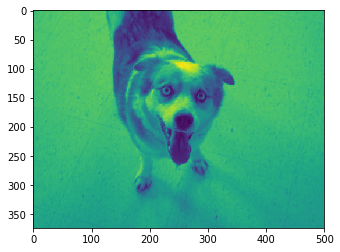

In [4]:
img = Image.open("dog.jpg")
img = img.convert("L")
img.show()
image = np.array(img)
print(image.shape)
plt.imshow(image)

In [10]:
def conv_2d(imag,filt,stride,pad):
    #print(image.shape[0])
    cnv_1 = (imag.shape[0] + 2*pad - filt.shape[0])//stride + 1
    cnv_2 = (imag.shape[1] + 2*pad - filt.shape[1])//stride + 1
    
    conv = np.zeros((cnv_1,cnv_2),"float16")
    
    
    for i in range(cnv_1):
        for j in range(cnv_2):
            v_start = i * stride
            v_end = v_start + filt.shape[0]
            
            h_start = j * stride
            h_end = h_start + filt.shape[1]
            
            conv[i,j] = np.sum(np.multiply(imag[v_start:v_end,h_start:h_end],filt))
            #print(v_start,v_end,h_start,h_end)
    return conv


    

In [11]:
def vect_conv(a,f,std,pd):
    s_1 = (a.shape[0] +2*pd -f.shape[0])//std + 1
    s_2 = (a.shape[1] +2*pd -f.shape[1])//std + 1
    
    cv = np.zeros((s_1,s_2))
    
    t = s_1*s_2
    
    for i in range(t):
        c = int(i//s_2)
        b = i%s_1
        
        cv[c,b]=np.sum(np.multiply(a[c*std:c*std+f.shape[0],b*std:b*std+f.shape[1]],f))
        #print(c,b,end="    ")
    return cv

In [12]:
def max_pool(imag,stride,filt):
    
    cnv_1 = (imag.shape[0] - filt)//stride + 1
    cnv_2 = (imag.shape[1] - filt)//stride + 1
    
    conv = np.zeros((cnv_1,cnv_2))
    
    
    for i in range(cnv_1):
        for j in range(cnv_2):
            v_start = i * stride
            v_end = v_start + filt
            
            h_start = j * stride
            h_end = h_start + filt
            
            conv[i,j] = np.max(imag[v_start:v_end,h_start:h_end])
            #print(v_start,v_end,h_start,h_end)
    return conv

In [59]:
def conv_33d(imag,filt,stride,pad):
    
    #print(image.shape[0])
    cnv_1 = (imag.shape[0] + 2*pad - filt.shape[0])//stride + 1
    cnv_2 = (imag.shape[1] + 2*pad - filt.shape[1])//stride + 1
    
    b = np.zeros((filt.shape[0]*filt.shape[1],cnv_1*cnv_2),dtype="float16")
    
    z=0
    for i in range(cnv_1):
        v_start = i * stride
        v_end = v_start + filt.shape[0]
        for j in range(cnv_2):

            
            h_start = j * stride
            h_end = h_start + filt.shape[1]
            
            b[:,z] = imag[v_start:v_end,h_start:h_end].flatten()
            #b = np.append(b,np.reshape(imag[v_start:v_end,h_start:h_end],(imag[v_start:v_end,h_start:h_end].shape[0]*imag[v_start:v_end,h_start:h_end].shape[0],1)),axis=1)
            z+=1
    
    
    
    b = np.dot(np.reshape(filt,(filt.shape[0]*filt.shape[1],1)).T,b)
            
            #print(v_start,v_end,h_start,h_end)
    return b

In [71]:
a=np.random.randint(7,size=(3000,3000),dtype="int8")
fil=np.array(([1,1,1],[0,0,0],[-1,-1,-1]))

In [74]:


fil = np.random.rand(10,10)
#fil = np.array(([[1,1,1],[0,0,0],[-1,-1,-1]],[[1,1,1],[0,0,0],[-1,-1,-1]],[[1,1,1],[0,0,0],[-1,-1,-1]]))
t_1 = time()
c = conv_2d(a,fil,1,0)

print(c.shape)

print(time() - t_1)
#plt.imshow(c)
##b=max_pool(c,2,4)


(2991, 2991)
79.76145815849304


In [ ]:
t_1 = time()
c = conv_33d(a,fil,1,0)

print(c.shape)
print(time() - t_1)

In [26]:
print(c.nbytes//(1042*1024))

67


In [39]:
import cProfile

In [40]:


cProfile.run("conv_33d(a,fil,1,0)")


(9, 8988004)
         8988049 function calls in 26.212 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   16.377   16.377   26.187   26.187 <ipython-input-24-407ae6828133>:1(conv_33d)
        1    0.025    0.025   26.212   26.212 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:163(reshape)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:50(_wrapfunc)
        3    0.000    0.000    0.001    0.000 iostream.py:195(schedule)
        2    0.000    0.000    0.000    0.000 iostream.py:300(_is_master_process)
        2    0.000    0.000    0.000    0.000 iostream.py:313(_schedule_flush)
        2    0.000    0.000    0.001    0.000 iostream.py:366(write)
        3    0.000    0.000    0.000    0.000 iostream.py:93(_event_pipe)
        3    0.001    0.000    0.001    0.000 socket.py:333(send)
        3    0.000    0.000    0.000    0.000 threading.py:1062(_wait_for_tstate_lock)

[[2 3]
 [2 0]
 [4 0]
 [1 3]]     [[3 6]
 [0 5]
 [0 0]
 [3 1]]    [[6 0]
 [5 4]
 [0 6]
 [1 3]]


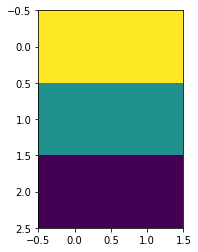

In [176]:
plt.imshow(b)

In [116]:
print(c.shape,b.shape)

(186, 249) (92, 123)


In [14]:
im = np.array(img)
print(im.shape)

(374, 500)


AttributeError: 'numpy.ndarray' object has no attribute 'show'

In [207]:

b=np.array(([3,3],[2,2],[1,1]))
c=b*a
print(a.shape,b.shape,c.shape)




(3, 3, 2) (3, 2) (3, 3, 2)


In [208]:
print(c,"\n\n")

[[[3. 3.]
  [2. 2.]
  [1. 1.]]

 [[3. 3.]
  [2. 2.]
  [1. 1.]]

 [[3. 3.]
  [2. 2.]
  [1. 1.]]] 




In [150]:
a=np.array(([[1,1,1],[0,0,0],[-1,-1,-1]],[[1,1,1],[0,0,0],[-1,-1,-1]],[[1,1,1],[0,0,0],[-1,-1,-1]]))
print(a.shape)

(3, 3, 3)


In [256]:
def conv_3d(imag,filt,stride,pad):
    #print(image.shape[0])
    cnv_1 = (imag.shape[0] + 2*pad - filt.shape[1])//stride + 1
    cnv_2 = (imag.shape[1] + 2*pad - filt.shape[2])//stride + 1
    
    conv = np.zeros((filt.shape[0],cnv_1,cnv_2))
    
    for k in range(filt.shape[0]):
        for i in range(cnv_1):
            for j in range(cnv_2):
                v_start = i * stride
                v_end = v_start + filt.shape[1]

                h_start = j * stride
                h_end = h_start + filt.shape[2]

                conv[k,i,j] = np.sum(np.multiply(imag[v_start:v_end,h_start:h_end],filt[k,:,:]))
            #print(v_start,v_end,h_start,h_end)
    return conv

In [262]:
#fil = np.array(([[1,2,3],[4,5,6],[-1,-1,-1]],[[7,1,4],[0,0,0],[-1,-1,7]],[[4,1,1],[5,0,0],[-1,-1,-1]]))
fil = np.random.rand(1000,3,3)

In [263]:
a=np.ones((70,70))
print(conv_3d(a,fil,1,0).shape)

(1000, 68, 68)


In [222]:
for i in range(3):
    print(fil[i,:,:],"\n\n")

[[ 1  2  3]
 [ 4  5  6]
 [-1 -1 -1]] 


[[ 7  1  4]
 [ 0  0  0]
 [-1 -1  7]] 


[[ 4  1  1]
 [ 5  0  0]
 [-1 -1 -1]] 




In [265]:
def conv(imag,filt,stride,pad):
    #print(image.shape[0])
    cnv_1 = (imag.shape[0] + 2*pad - filt[0])//stride + 1
    cnv_2 = (imag.shape[1] + 2*pad - filt[1])//stride + 1
    
    conv = np.zeros((cnv_1,cnv_2))
    
    
    for i in range(cnv_1):
        for j in range(cnv_2):
            v_start = i * stride
            v_end = v_start + filt[0]
            
            h_start = j * stride
            h_end = h_start + filt[1]
            
            #conv[i,j] = np.sum(np.multiply(imag[v_start:v_end,h_start:h_end],filt))
            print(imag[v_start:v_end,h_start:h_end])
    #return conv

In [225]:

print(a)
#conv(a,(2,2),1,0)

[[0 4 5 0 6 3 3 3]
 [2 3 2 0 1 1 0 1]
 [4 2 5 5 1 4 3 1]
 [0 4 5 1 1 5 1 5]
 [6 4 2 0 4 4 6 5]
 [2 0 3 5 6 2 6 0]
 [0 2 4 3 6 4 6 2]
 [0 6 6 1 5 5 3 1]]


In [441]:
print(a.split[1,2])

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [398]:
b=[]
stride
for i in range(4):
    c=i%2
    d=i//2
    print(a[d*1:d*1+3,c*1:c*1+3])

NameError: name 'stride' is not defined

In [297]:
for i in range(9):
    print(i//3,end=" ")
    

0 0 0 1 1 1 2 2 2 

In [499]:
def vect_conv(a,f,std,pd):
    s_1 = (a.shape[0] +2*pd -f.shape[0])//std + 1
    s_2 = (a.shape[1] +2*pd -f.shape[1])//std + 1
    
    cv = np.zeros((s_1,s_2))
    
    for i in range(s_1*s_2):
        c = int(i//s_2)
        b = i%s_1
        
        cv[c,b]=np.sum(np.multiply(a[c*std:c*std+f.shape[0],b*std:b*std+f.shape[1]],f))
        #print(c,b,end="    ")
    return cv

In [500]:
c=vect_conv(a,(2,2),2,0)

AttributeError: 'tuple' object has no attribute 'shape'

In [273]:
fil = np.random.rand(2,2)
b = conv_33d(a,fil,1,0)

print(b.shape)

print(conv_2d(a,fil,1,0).shape)

(4, 998001)
(1, 998001)
(999, 999)


In [495]:
print(fil,fil.flatten())

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]] [ 1  1  1  0  0  0 -1 -1 -1]


In [31]:
from array import array

In [38]:
d[0]

0

In [43]:
print(a.shape)

(5002, 5002)


In [121]:
print(a)
print(a[:,1:5])

[[1 3 5 5]
 [3 1 6 1]
 [0 1 5 2]
 [5 3 3 2]]
[[3 5 5]
 [1 6 1]
 [1 5 2]
 [3 3 2]]


In [215]:
z=0
for i in range(2):
    for j in range(2):
        print(i,j,z)
        z+=1

0 0 0
0 1 1
1 0 2
1 1 3


In [22]:
a=np.random.rand(5,5)


In [6]:
for i in a:
    print(i)

[0.40407056 0.32569434 0.93378793 0.12979098 0.15764337]
[0.33124692 0.22905325 0.16203081 0.16692317 0.72756499]
[0.23887275 0.26099988 0.93856543 0.10629528 0.62218839]
[0.28332829 0.67674254 0.08704831 0.2004449  0.53540938]
[0.96129817 0.7842885  0.19490497 0.89050201 0.94465412]


In [44]:
def conv_23d(imag,filt,stride,pad):
    
    #print(image.shape[0])
    cnv_1 = (imag.shape[0] + 2*pad - filt.shape[0])//stride + 1
    cnv_2 = (imag.shape[1] + 2*pad - filt.shape[1])//stride + 1
   # b = np.zeros((filt.shape[0]*filt.shape[1],cnv_1*cnv_2),dtype="float16")
    print(cnv_1,cnv_2)
    z=0
    for i in range(cnv_1):
        v_start = i * stride
        v_end = v_start + filt.shape[0]
        for j in range(cnv_2):

            
            h_start = j * stride
            h_end = h_start + filt.shape[1]
            
            yield(imag[v_start:v_end,h_start:h_end].flatten())
            #b = np.append(b,np.reshape(imag[v_start:v_end,h_start:h_end],(imag[v_start:v_end,h_start:h_end].shape[0]*imag[v_start:v_end,h_start:h_end].shape[0],1)),axis=1)
            z+=1
    
    
    
   

In [37]:
a=np.random.randint(7,size=(400,400))
print(a)

[[5 6 4 ... 2 6 6]
 [6 4 6 ... 5 0 6]
 [0 6 3 ... 4 4 5]
 ...
 [1 3 0 ... 4 6 4]
 [6 4 1 ... 2 3 1]
 [1 6 1 ... 2 5 2]]


In [48]:
f=np.random.rand(100,100)


for v in conv_23d(a,f,1,0):
    pass
    

3901 3901


In [60]:
c=np.zeros((3901*3901,),"float16")
print(c.nbytes//(1024*1024))

MemoryError: 

In [3]:
import numpy as np

In [4]:
def max_pool(imag,stride,filt):
    
    cnv_1 = (imag.shape[0] - filt[0])//stride + 1
    cnv_2 = (imag.shape[1] - filt[1])//stride + 1
    
    pool = np.zeros((filt[0]*filt[1],cnv_1*cnv_2),dtype="float32")
    
    z=0
    for i in range(cnv_1):
        for j in range(cnv_2):
            v_start = i * stride
            v_end = v_start + filt[0]
            
            h_start = j * stride
            h_end = h_start + filt[1]
            
            pool[:,z] = imag[v_start:v_end,h_start:h_end].flatten()
            #print(imag[v_start:v_end,h_start:h_end].flatten())
            z+=1
    
    pool = np.max(pool,axis=0,keepdims=True)
    
    #print(pool.shape)
    pool = np.reshape(pool,(cnv_1,cnv_2))
    return pool

In [134]:
def D_max_pool(imag,stride,filt,maxx):
    
    cnv_1 = (imag.shape[0] - filt[0])//stride + 1
    cnv_2 = (imag.shape[1] - filt[1])//stride + 1
    
    pool = np.zeros((filt[0]*filt[1],cnv_1*cnv_2),dtype="float32")
    
    z=0
    for i in range(cnv_1):
        for j in range(cnv_2):
            v_start = i * stride
            v_end = v_start + filt[0]

            h_start = j * stride
            h_end = h_start + filt[1]

            pool[:,z] = imag[v_start:v_end,h_start:h_end].flatten()
            #print(imag[v_start:v_end,h_start:h_end].flatten())
            z+=1
      
#     
    #print(pool,maxx.flatten())
    p = np.where(pool == maxx.flatten(),1,0)
    print(p,"\n\n",pool,"\n\n",maxx.flatten())
#     pool = np.reshape(pool,(imag.shape[1],imag.shape[0]))
#     return pool

In [123]:
a=np.random.randint(100,size=(4,4))
print(a)

[[10 93 34 55]
 [99 69  8 75]
 [95 24 50  5]
 [26 82  8  1]]


In [124]:
z=max_pool(a,1,(2,2))

(4, 9)


In [126]:
print(z)
f=max_pool(a,2,(2,2))
print(f)

[[99. 93. 75.]
 [99. 69. 75.]
 [95. 82. 50.]]
(4, 4)
[[99. 75.]
 [95. 50.]]


False


c:\users\lapy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [130]:
print(a)

[[10 93 34 55]
 [99 69  8 75]
 [95 24 50  5]
 [26 82  8  1]]


In [158]:
print(D_max_pool(a,2,(2,2),f))

[[0 0 1 1]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]] 

 [[10. 34. 95. 50.]
 [93. 55. 24.  5.]
 [99.  8. 26.  8.]
 [69. 75. 82.  1.]] 

 [99. 75. 95. 50.]
None


In [159]:
b=np.array(([1,2],[3,4]))
print(a)

[[10 93 34 55]
 [99 69  8 75]
 [95 24 50  5]
 [26 82  8  1]]


In [90]:
print(b.repeat(3,axis=1).repeat(3,axis=0))

[[1 1 1 2 2 2]
 [1 1 1 2 2 2]
 [1 1 1 2 2 2]
 [3 3 3 4 4 4]
 [3 3 3 4 4 4]
 [3 3 3 4 4 4]]


In [180]:
def conv(imag,filt,stride,pad):

    cnv_1 = ((imag.shape[0] + 2*pad) - filt.shape[0])//stride + 1
    cnv_2 = ((imag.shape[1] + 2*pad) - filt.shape[1])//stride + 1
    
    b = np.zeros((filt.shape[0]*filt.shape[1],cnv_1*cnv_2),dtype="float32")
    
    z=0
    
    for i in range(cnv_1):
        v_start = i * stride
        v_end = v_start + filt.shape[0]
        for j in range(cnv_2):

            
            h_start = j * stride
            h_end = h_start + filt.shape[1]
            
            b[:,z] = imag[v_start:v_end,h_start:h_end].flatten()
            
            z+=1
    b=np.dot(np.reshape(filt,(filt.shape[0]*filt.shape[1],1)).T,b)

In [181]:
f=np.random.rand(250,250)
g=np.random.rand(124,124)
back_conv(f,g,2,0)

3861.0112159096107  7721.933637611317  11576.631453796748  15458.995876990899  19327.104257670988  23199.116537513284  27052.589804107985  30938.34124476603  34815.21881563142  38695.0095595124  42577.19133052319  46447.59289141804  50320.6132116065  54200.21070149501  58091.80546539852  61975.85691536503  65886.75072566538  69760.93613900892  73674.64601685367  77580.42176075545  81486.6416974726  85397.72447033289  89281.43815733508  93155.04584608375  97045.42507585445  100921.17527476812  104823.48938066117  108730.83568602342  112619.40854220367  116513.34885107954  120410.65071657891  124312.41323166038  128212.35008497282  132117.6700523068  136019.62104698416  139926.2681512707  143824.33004492335  147703.18304179827  151606.19439043407  155500.4338822027  159409.32045380413  163302.87353654025  167202.66781707952  171085.26132826952  174962.47094091872  178822.04859950702  182716.48690194328  186577.43750742523  190448.1864416866  194305.25135645957  198160.80700805414  202029

3229509.0455176756  3233373.8203682434  3237233.3249178897  3241076.338062623  3244934.0966770034  3248793.3807789395  3252672.0601170845  3256523.2983899205  3260387.5959506882  3264256.854944155  3268127.516182787  3272010.271657603  3275866.030326084  3279736.493785607  3283617.3687228626  3287497.319054379  3291379.7327035135  3295237.313208215  3299122.1651475294  3303018.223727702  3306917.181557049  3310804.5082078525  3314698.7252250705  3318588.6949400483  3322471.0651417146  3326352.3309617382  3330244.390504379  3334135.2620687103  3338000.4393486716  3341883.9987271633  3345752.8452846827  3349637.3439177927  3353518.8867754797  3357405.1820403277  3361301.048499131  3365199.5322915553  3369110.111376043  3373006.5881416677  3376889.9290707507  3380785.8184496816  3384688.443837965  3388577.1621033214  3392455.2035535644  3396346.2643886334  3400227.2352044107  3404112.9918140103  3407982.8540631593  3411841.306247431  3415713.581585438  3419567.4807614293  3423454.19788252

5707487.629531479  5711360.965501146  5715202.563114501  5719057.9445540365  5722901.2618618645  5726746.476919707  5730593.187061008  5734449.512800193  5738278.927022787  5742147.704060911  5745987.172078537  5749854.259805783  5753710.518965851  5757556.506216869  5761407.521823842  5765270.177243767  5769165.714224771  5773042.373426382  5776908.565603458  5780802.612499487  5784693.639937185  5788587.014001198  5792473.310686894  5796340.060866164  5800197.845304986  5804064.165147357  5807933.08774748  5811802.140803926  5815675.972786538  5819550.894101029  5823420.104508383  5827295.648145162  5831181.759262965  5835054.581497791  5838919.311961052  5842794.799542495  5846681.22642349  5850580.69165351  5854463.975384828  5858337.103817597  5862236.046770744  5866128.106378953  5869996.955499882  5873881.504692843  5877760.997255355  5881642.38852831  5885523.417376933  5889397.945148897  5893263.815215164  5897134.715947651  5900999.565939212  5904869.947449519  5908747.536862

8927330.907297038  8931175.272399588  8935023.337343004  8938879.278003205  8942715.099264614  8946550.753071409  8950394.63767963  8954236.118995436  8958069.049761167  8961913.794377012  8965773.356633231  8969609.11381317  8973458.42209679  8977304.146489304  8981166.543957133  8985016.11890117  8988887.878481321  8992767.290836528  8996640.69315907  9000510.21780455  9004377.730414975  9008237.754063899  9012097.09009546  9015966.180485785  9019847.055410195  9023716.668531343  9027596.141927341  9031451.81564744  9035327.864304062  9039197.814905565  9043039.832534779  9046907.250592975  9050804.203845901  9054677.458119387  9058557.539759912  9062416.916489685  9066292.879074497  9070152.250495432  9074014.389972655  9077874.554354025  9081756.270590963  9085628.49938524  9089492.074056562  9093361.765671764  9097220.013677455  9101093.415893786  9104960.483294757  9108827.183814602  9112688.101858908  9116574.725288453  9120445.434047138  9124308.42656653  9128174.771366488  913

12138028.330333062  12141879.92479798  12145720.368416877  12149576.32217433  12153410.674917638  12157230.727217566  12161054.624005638  12164889.502811793  12168693.362686753  12172516.854566475  12176339.821802892  12180175.943498356  12184011.342268206  12187833.038183672  12191674.806096772  12195546.083183866  12199391.258936211  12203256.337752972  12207125.262444794  12210982.527532427  12214825.859533053  12218674.543672277  12222511.78787235  12226374.179571506  12230235.77704918  12234092.60518059  12237923.0878381  12241774.163286107  12245639.125726754  12249500.754624568  12253368.570318002  12257227.692378642  12261090.1505396  12264954.889990242  12268834.038411655  12272710.042157538  12276569.736159721  12280424.973466331  12284299.701781904  12288157.02227074  12292021.802639099  12295878.52477023  12299759.87801994  12303616.06573084  12307451.755520158  12311290.553866424  12315153.048029982  12319015.499638865  12322890.991275359  12326753.551686235  12330617.5188

In [1]:
def D_max_pool(imag,stride,filt,d):
    
    cnv_1 = (imag.shape[0] - filt[0])//stride + 1
    cnv_2 = (imag.shape[1] - filt[1])//stride + 1
    
    #pool = np.zeros((filt[0]*filt[1],cnv_1*cnv_2),dtype="float32")
    der = np.zeros((imag.shape[0],imag.shape[1]),dtype="float32")
    z=0
    for i in range(cnv_1):
        v_start = i * stride
        v_end = v_start + filt[0]
        for j in range(cnv_2):

            
            h_start = j * stride
            h_end = h_start + filt[1]
            
            maxx  = imag[v_start:v_end,h_start:h_end]
            #print(imag[v_start:v_end,h_start:h_end].flatten())
            #print(maxx, np.where(maxx == np.max(maxx),1,0))
            m = maxx == np.max(maxx)
            der[v_start:v_end,h_start:h_end] = m * d[i,j]
            #print(i,j,z,v_start, v_end,h_start ,h_end)
           # print(np.multiply(np.where(maxx == np.max(maxx),1,0),d[i,j]),"\n")
            z+=1
    return der

In [22]:
#a=np.random.randint(100,size=(7,7))
print(D_max_pool(a,2,(3,3),max_pool(a,2,(3,3))))

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 94.  0.]
 [ 0.  0.  0. 96.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 73.]
 [96.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 96.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [25]:
print(a,"\n\n",max_pool(a,2,(3,3)))

[[87 35 23 26 79 91 73]
 [11 46 94 80 31 94 68]
 [61 50 93 96 24 22 30]
 [23  2 70  0 11 70 73]
 [96 24 86 20 16 14 62]
 [46 47 76 72 96  7 86]
 [44 92 62 31  9 23 29]] 

 [[94. 96. 94.]
 [96. 96. 73.]
 [96. 96. 96.]]


In [38]:
def back(imag,stride,filt,d):
    
    cnv_1 = (imag.shape[0] - filt[0])//stride + 1
    cnv_2 = (imag.shape[1] - filt[1])//stride + 1
    
    #pool = np.zeros((filt[0]*filt[1],cnv_1*cnv_2),dtype="float32")
    der = np.zeros((imag.shape[0],imag.shape[1]),dtype="float32")
    z=0
    for i in range(cnv_1):
        v_start = i * stride
        v_end = v_start + filt[0]
        for j in range(cnv_2):
          
            
            h_start = j * stride
            h_end = h_start + filt[1]
            a=imag[v_start:v_end,h_start:h_end]
#             print(np.max(a),end=" ")
           # print(np.argmax(a)%a.shape[0],np.argmax(a)//a.shape[1],np.argmax(a))#@,a[np.argmax(a)//a.shape[1],np.argmax(a)%a.shape[0]])
            der[v_start:v_end,h_start:h_end][np.argmax(a)//a.shape[1],np.argmax(a)%a.shape[0]] =d[i,j]
#         
    return der


In [39]:
print(back(a,2,(3,3),max_pool(a,2,(3,3))))

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 94.  0.  0. 94.  0.]
 [ 0.  0.  0. 96.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 73.]
 [96.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 96.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [35]:
print(a)

[[87 35 23 26 79 91 73]
 [11 46 94 80 31 94 68]
 [61 50 93 96 24 22 30]
 [23  2 70  0 11 70 73]
 [96 24 86 20 16 14 62]
 [46 47 76 72 96  7 86]
 [44 92 62 31  9 23 29]]
